In [6]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import glob 
import os
import pandas as pd

### Set env parameters

In [7]:
size = 15
agents = 8
foods = 1
coop = True

limit = 500000
smoothing = 200

### Find trained models in this setting

In [8]:

exp = f'2023-*lbf*{size}x{size}*{agents}p_{foods}f*{"coop" if coop==True else ""}*'
print(exp)
alg = 'MAAC'
files = glob.glob(f'{alg}/experiments/{exp}/summary/reward_total.txt')
# files += glob.glob(f'{alg}/experiments/{exp2}/summary/reward_*')
files

2023-*lbf*10x10*4p_4f*coop*


[]

In [9]:
labels = ['MAAC']
df = pd.DataFrame()

for i,f in enumerate(files):
    rew = np.loadtxt(f)
    name = os.path.basename(os.path.dirname(os.path.dirname(f)))
    temp = pd.DataFrame.from_dict({'alg':alg, 
                                   'name': name, 
                                   'reward': rew[:limit], 
                                   'label': labels[i]
                                  }
                                 )
    temp["avg_reward"] = temp["reward"].ewm(span=smoothing).mean()
    df = pd.concat([df,temp])

df = df.reset_index()
df = df.rename(columns={'index':'episodes'})

ValueError: Could not interpret value `avg_reward` for parameter `y`

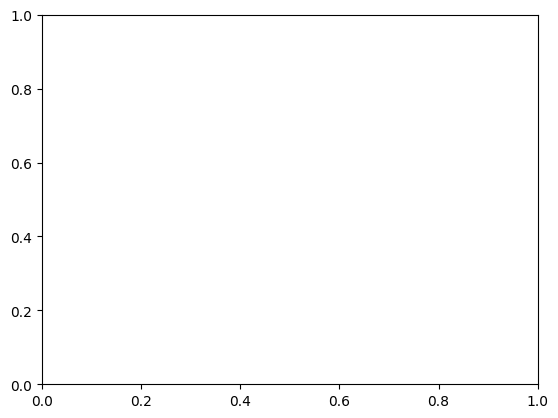

In [10]:
fig, ax = plt.subplots()
# sns.lineplot(data=df, x="steps", y="rew_total", legend='full', ax=ax)
title = f'{alg}_lbf_{size}x{size}_{agents}p_{foods}f{"_coop" if coop==True else ""}'
sns.lineplot(data=df, x="episodes", y="avg_reward", hue='label', legend='full', alpha=0.7, palette='mako')
ax.set_ylim(0,1)
plt.legend(loc='lower right') # labels=['reduced_batch_size', 'sparse_observation', 'standard']
plt.title(title)
# plt.savefig(title)
plt.show()

### RMAC

In [ ]:
exp2 = f'2023-*lbf*{size}x{size}*{agents}p_{foods}f*{"coop" if coop==True else ""}*'
alg2 = 'rmac'

files2 = glob.glob(f'{alg2}/experiments/{exp2}/summary/reward_total.txt')
print(files2)

In [ ]:
labels2 = ['b3 - all', 'b0 - no local']
limit = 60000
df2 = pd.DataFrame()
for i,f in enumerate(files2):
    rew = np.loadtxt(f)
    name = os.path.basename(os.path.dirname(os.path.dirname(f)))
    temp = pd.DataFrame.from_dict({'alg':alg2, 'name': name, 'reward':rew[:limit],'label':labels2[i] }) 
    temp["avg_reward"] = temp["reward"].ewm(span=smoothing).mean()
    df2 = pd.concat([df2,temp])

df2 = df2.reset_index()
df2 = df2.rename(columns={'index':'episodes'})
df2.head()

In [ ]:
sns.color_palette("flare", as_cmap=True)
fig, ax = plt.subplots()
sns.lineplot(data=df2.reset_index(), x="episodes", y="avg_reward", hue='label', legend='full', alpha=0.7, )
ax.set_ylim(0,1)
plt.legend(loc='lower right')
t = f'Comparison_lbf_{size}x{size}_{agents}p_{foods}f{"_coop" if coop==True else ""}'
plt.title(t)
# plt.savefig(t)

plt.show()

In [11]:
df_total = pd.concat([df2,df])
df_total = df_total.reset_index()
df_total.drop(columns=['episodes'], inplace=True)
df_total = df_total.rename(columns={'index':'episodes'})

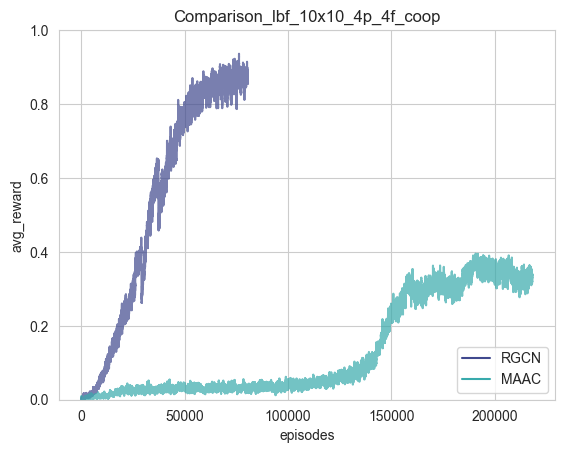

In [12]:
fig, ax = plt.subplots()
sns.lineplot(data=df_total, x="episodes", y="avg_reward", hue='label', legend='full', alpha=0.7, palette='mako')
ax.set_ylim(0,1)
plt.legend(loc='lower right')
t = f'Comparison_lbf_{size}x{size}_{agents}p_{foods}f{"_coop" if coop==True else ""}'
plt.title(t)
plt.savefig(t)
plt.show()